#               Case Study 0 3 

##             Artificial Neural Network

###           mobile_price_classification

Data and class labels are available in mobile_price_classification.csv file. Use price_range column as label and remaining columns as data.

### Import necessary files

In [1]:
import numpy as np
import pandas as pd

### Import datafiles

In [3]:
df = pd.read_csv('/content/mobile_price_classification(1).csv')

### Data Analysis and Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [5]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
df.shape

(2000, 21)

### Feature and Label Extraction

In [8]:
data = df.drop('price_range',axis=1)
label = df.price_range

In [9]:
label.unique()

array([1, 2, 3, 0])

In [10]:
label.shape

(2000,)

In [11]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,primary_camera,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [12]:
label.shape

(2000,)

In [13]:
#Scaling using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['battery_power', 'front_cam','int_memory','mobile_wt','n_cores','primary_camera','px_height','px_width','ram', 'sc_h','sc_w','talk_time' ]
scaler = MinMaxScaler()
scaler.fit(data[cols_to_scale])
data[cols_to_scale] = scaler.transform(data[cols_to_scale])

In [14]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['clock_speed', 'm_dep' ]
scaler = MinMaxScaler()
scaler.fit(data[cols_to_scale])
data[cols_to_scale] = scaler.transform(data[cols_to_scale])

In [15]:
data.head

<bound method NDFrame.head of       battery_power  bluetooth  clock_speed  dual_sim  front_cam  4G  \
0          0.227789          0         0.68         0   0.052632   0   
1          0.347361          1         0.00         1   0.000000   1   
2          0.041416          1         0.00         1   0.105263   1   
3          0.076152          1         0.80         0   0.000000   0   
4          0.881764          1         0.28         0   0.684211   1   
...             ...        ...          ...       ...        ...  ..   
1995       0.195725          1         0.00         1   0.000000   1   
1996       0.977956          1         0.84         1   0.000000   0   
1997       0.941884          0         0.16         1   0.052632   1   
1998       0.675351          0         0.16         0   0.210526   1   
1999       0.006012          1         0.60         1   0.263158   1   

      int_memory     m_dep  mobile_wt   n_cores  primary_camera  px_height  \
0       0.080645  0.555556 

### Modelling 

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.25, random_state=10)

In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(4,activation='softmax'))

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
47/47 [==============================] - 1s 7ms/step - loss: 1.3800 - accuracy: 0.3227 - val_loss: 1.3624 - val_accuracy: 0.3420
Epoch 2/100
47/47 [==============================] - 0s 4ms/step - loss: 1.3527 - accuracy: 0.3827 - val_loss: 1.3402 - val_accuracy: 0.3960
Epoch 3/100
47/47 [==============================] - 0s 3ms/step - loss: 1.3201 - accuracy: 0.4627 - val_loss: 1.3026 - val_accuracy: 0.4560
Epoch 4/100
47/47 [==============================] - 0s 3ms/step - loss: 1.2708 - accuracy: 0.5340 - val_loss: 1.2517 - val_accuracy: 0.4680
Epoch 5/100
47/47 [==============================] - 0s 3ms/step - loss: 1.2077 - accuracy: 0.5387 - val_loss: 1.1861 - val_accuracy: 0.4840
Epoch 6/100
47/47 [==============================] - 0s 3ms/step - loss: 1.1311 - accuracy: 0.5813 - val_loss: 1.1105 - val_accuracy: 0.5820
Epoch 7/100
47/47 [==============================] - 0s 3ms/step - loss: 1.0544 - accuracy: 0.6213 - val_loss: 1.0373 - val_accuracy: 0.5840
Epoch 8/100
4

ANN clasifier has been modelled with Accuracy 0.98 and Val_accuracy 0.95

Scaler applied is MinMax Scaler

In [21]:
y_pred = model.predict(X_test)

16/16 [==============================] - 0s 1ms/step


In [22]:
y_pred

array([[1.11042414e-06, 2.57399050e-04, 9.13549401e-03, 9.90606010e-01],
       [1.24575615e-06, 3.00590938e-04, 1.05846571e-02, 9.89113450e-01],
       [4.50191874e-04, 1.03630155e-01, 8.92564535e-01, 3.35516245e-03],
       ...,
       [3.15691754e-02, 9.66441751e-01, 1.95795554e-03, 3.11195436e-05],
       [6.02939129e-01, 3.95901561e-01, 1.13218476e-03, 2.70724486e-05],
       [8.81365314e-03, 9.21516120e-01, 6.90327510e-02, 6.37465098e-04]],
      dtype=float32)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                672       
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,046
Trainable params: 1,046
Non-trainable params: 0
_________________________________________________________________


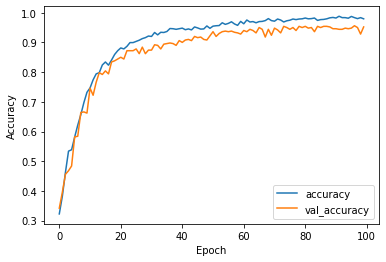

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')

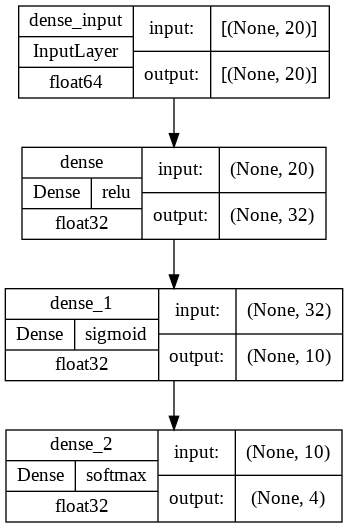

In [26]:
from tensorflow.keras.utils import plot_model
model_img_file = 'model.png'
plot_model(model, to_file=model_img_file, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

## ANN Classifier Modelling with Standard Scaler 

In [27]:
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(data)
#data = scaler.transform(data)


cols_to_scale = ['battery_power', 'front_cam','int_memory','mobile_wt','n_cores','primary_camera','px_height','px_width','ram', 'sc_h','sc_w','talk_time' ]
scaler = StandardScaler()
scaler.fit(data[cols_to_scale])
data[cols_to_scale] = scaler.transform(data[cols_to_scale])

In [28]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['clock_speed', 'm_dep' ]
scaler = StandardScaler()
scaler.fit(data[cols_to_scale])
data[cols_to_scale] = scaler.transform(data[cols_to_scale])

In [29]:
data.head

<bound method NDFrame.head of       battery_power  bluetooth  clock_speed  dual_sim  front_cam  4G  \
0         -0.902597          0     0.830779         0  -0.762495   0   
1         -0.495139          1    -1.253064         1  -0.992890   1   
2         -1.537686          1    -1.253064         1  -0.532099   1   
3         -1.419319          1     1.198517         0  -0.992890   0   
4          1.325906          1    -0.395011         0   2.002254   1   
...             ...        ...          ...       ...        ...  ..   
1995      -1.011860          1    -1.253064         1  -0.992890   1   
1996       1.653694          1     1.321096         1  -0.992890   0   
1997       1.530773          0    -0.762748         1  -0.762495   1   
1998       0.622527          0    -0.762748         0  -0.071307   1   
1999      -1.658331          1     0.585621         1   0.159088   1   

      int_memory     m_dep  mobile_wt   n_cores  primary_camera  px_height  \
0      -1.380644  0.340740 

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.25, random_state=10)

In [31]:
from keras.models import Sequential
from keras.layers import Dense

In [32]:
model = Sequential()
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(4,activation='softmax'))

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
47/47 [==============================] - 1s 6ms/step - loss: 1.4285 - accuracy: 0.2493 - val_loss: 1.3819 - val_accuracy: 0.2620
Epoch 2/100
47/47 [==============================] - 0s 4ms/step - loss: 1.3495 - accuracy: 0.2873 - val_loss: 1.3366 - val_accuracy: 0.3280
Epoch 3/100
47/47 [==============================] - 0s 4ms/step - loss: 1.2989 - accuracy: 0.4413 - val_loss: 1.2915 - val_accuracy: 0.4620
Epoch 4/100
47/47 [==============================] - 0s 3ms/step - loss: 1.2407 - accuracy: 0.5840 - val_loss: 1.2305 - val_accuracy: 0.5380
Epoch 5/100
47/47 [==============================] - 0s 4ms/step - loss: 1.1670 - accuracy: 0.5920 - val_loss: 1.1532 - val_accuracy: 0.5560
Epoch 6/100
47/47 [==============================] - 0s 3ms/step - loss: 1.0830 - accuracy: 0.6453 - val_loss: 1.0722 - val_accuracy: 0.6080
Epoch 7/100
47/47 [==============================] - 0s 4ms/step - loss: 1.0044 - accuracy: 0.6920 - val_loss: 0.9994 - val_accuracy: 0.6480
Epoch 8/100
4

ANN clasifier has been modelled with Accuracy 1.0 and Val_accuracy 0.93

Scaler applied is Standard Scaler


In [35]:
y_pred = model.predict(X_test)

16/16 [==============================] - 0s 2ms/step


In [36]:
y_pred

array([[7.2967506e-04, 4.6668751e-03, 1.2570695e-02, 9.8203272e-01],
       [7.4629678e-04, 4.7851554e-03, 1.3237999e-02, 9.8123056e-01],
       [4.1867822e-04, 4.9116481e-03, 9.8890793e-01, 5.7616681e-03],
       ...,
       [1.0001058e-01, 8.9728606e-01, 2.5752052e-03, 1.2812483e-04],
       [8.5648066e-01, 1.4277259e-01, 7.3178194e-04, 1.4992352e-05],
       [3.2972062e-03, 9.9199742e-01, 4.3859356e-03, 3.1941058e-04]],
      dtype=float32)

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                672       
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
 dense_5 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,046
Trainable params: 1,046
Non-trainable params: 0
_________________________________________________________________


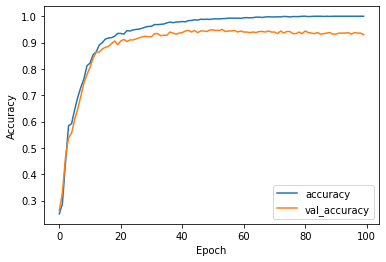

In [39]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')

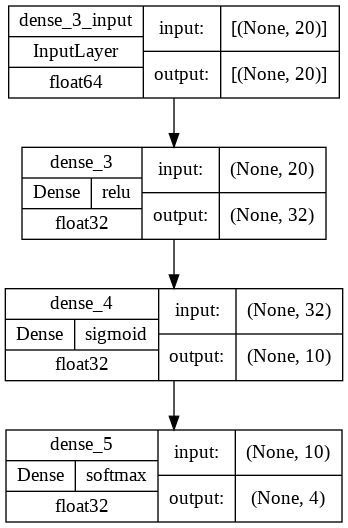

In [40]:
from tensorflow.keras.utils import plot_model
model_img_file = 'model.png'
plot_model(model, to_file=model_img_file, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

                      Submitted By: Ajuma Mohammed 